In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv(r"C:\Users\User\Desktop\Projects\Real Estate\House Dataset\train.csv")

In [4]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
df.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.shape

(1460, 81)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum() 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Data Preprocessing

In [11]:
cat=df.select_dtypes(include='object')
num=df.select_dtypes(exclude='object')

In [12]:
cat.head(2)  

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [13]:
num.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


we have 43 Columns of Catagorical and 38 for numerical so handle them accordingly

In [14]:
print("Missing values in Each Columns")
print("="*30)
print(df.isna().sum())
print("="*30)
print(f"Total Missing Values: ",df.isna().sum().sum())

Missing values in Each Columns
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Total Missing Values:  7829


As there are missing values we have mostly three common ways first is to get a value counts of each row then we can replace it with mode for catagorical and median/mean for numerical also we can drop them and we can also make a small ml model to predict this value.

In [15]:
print("Missing values in Each Catagorical Columns")
print("="*30)
print(cat.isna().sum())
print("="*30)
print(f"Total Missing catagorical Values: ",cat.isna().sum().sum())

Missing values in Each Catagorical Columns
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int6

In [16]:
cat=cat.fillna(cat.mode().iloc[0])

In [17]:
cat.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [18]:
print("Total Null Values in Catagorical Column Now:",cat.isna().sum().sum())

Total Null Values in Catagorical Column Now: 0


In [19]:
print("Missing values in Each Numerical Columns")
print("="*30)
print(num.isna().sum())
print("="*30)
print(f"Total Missing Numerical Values: ",num.isna().sum().sum())

Missing values in Each Numerical Columns
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
Total Missing Numerical Values:  348


In [20]:
num=num.fillna(num.median())

In [21]:
num.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


In [22]:
print(f"Total Null values in Numerical Columns Now : {num.isna().sum().sum()}")

Total Null values in Numerical Columns Now : 0


Now in second step of preprocessing we will handle duplicated data

In [23]:
print(f"Total duplicated rows:",df.duplicated().sum().sum())

Total duplicated rows: 0


In [24]:
df.drop_duplicates(inplace=True)

In [25]:
print(f"Total duplicated rows:",df.duplicated().sum().sum())

Total duplicated rows: 0


Now we will drop features that arae less corelated with our target bcz moving on with them will be useless

In [26]:
corr=num.corr()

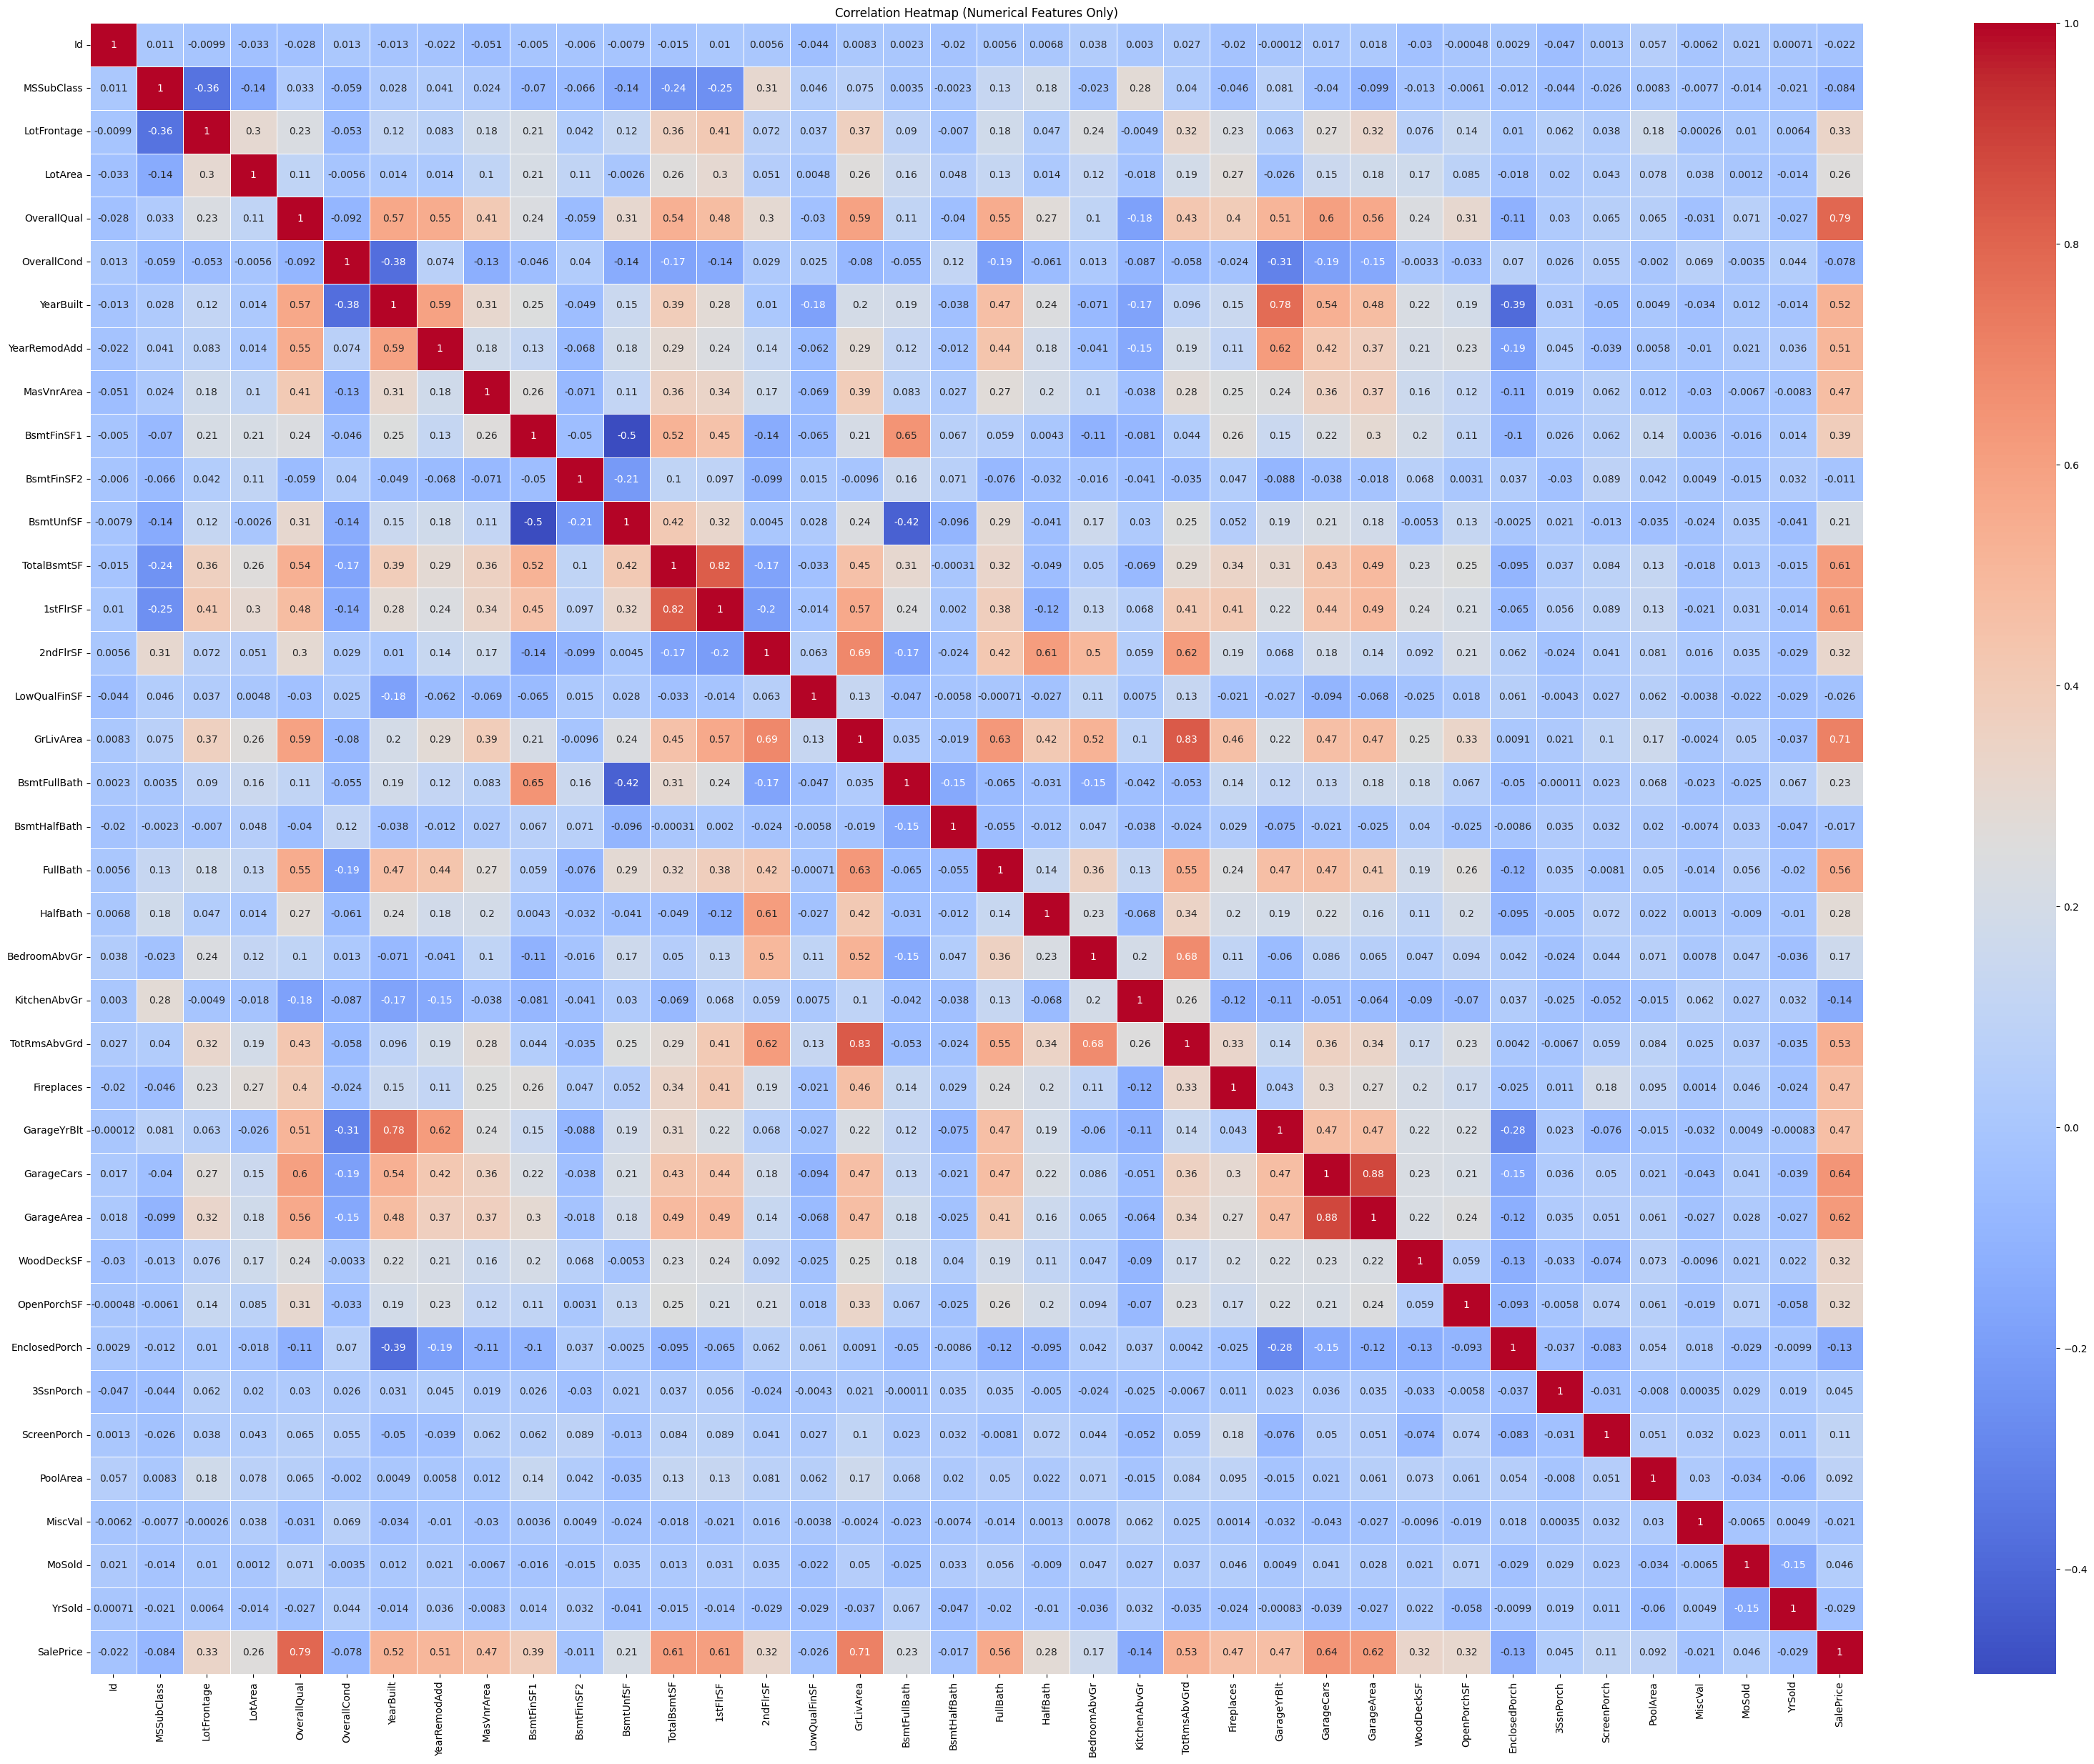

In [27]:
plt.figure(figsize=(40, 30))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


In [28]:
target = 'SalePrice'
corr_target = corr[target].abs().sort_values(ascending=False)


In [29]:
selected_num = corr_target[corr_target > 0.3].index.tolist()
selected_num


['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'GarageYrBlt',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF']

In [30]:
cat.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [31]:
target = 'SalePrice'
anova_results = {}

for col in cat:
    unique_vals = df[col].dropna().unique()  # remove NaNs
    if len(unique_vals) > 1:  # need at least 2 groups
        groups = [df[df[col] == val][target].dropna() for val in unique_vals]
        f_stat, p_val = f_oneway(*groups)
        anova_results[col] = p_val

In [32]:
anova_results

{'MSZoning': np.float64(8.817633866267756e-35),
 'Street': np.float64(0.11704860406780393),
 'Alley': np.float64(4.899826166771108e-08),
 'LotShape': np.float64(6.44752385200789e-25),
 'LandContour': np.float64(2.7422167521361825e-08),
 'Utilities': np.float64(0.5847167739689093),
 'LotConfig': np.float64(3.16316747360238e-06),
 'LandSlope': np.float64(0.14139635841138493),
 'Neighborhood': np.float64(1.5586002827706803e-225),
 'Condition1': np.float64(8.904549416139877e-08),
 'Condition2': np.float64(0.04342565836091132),
 'BldgType': np.float64(2.0567364604956652e-10),
 'HouseStyle': np.float64(3.3767765351180526e-25),
 'RoofStyle': np.float64(3.6535230470963525e-17),
 'RoofMatl': np.float64(7.231444779981005e-08),
 'Exterior1st': np.float64(2.586088728636935e-43),
 'Exterior2nd': np.float64(4.842185670694371e-43),
 'MasVnrType': np.float64(2.0105801004590173e-13),
 'ExterQual': np.float64(1.4395510967774283e-204),
 'ExterCond': np.float64(5.106680608669252e-07),
 'Foundation': np.fl

In [33]:
selected_cat= [col for col, p in anova_results.items() if p < 0.05]

In [34]:
df_selected = df[selected_num + selected_cat + [target]]

In [35]:
df_selected.head(3)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
0,208500,7,1710,2,548,856,856,2,8,2003,...,NaN,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,208500
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,181500
2,223500,7,1786,2,608,920,920,2,6,2001,...,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,223500


so we are able to remove 23 columns according to their corelation with our target variable.

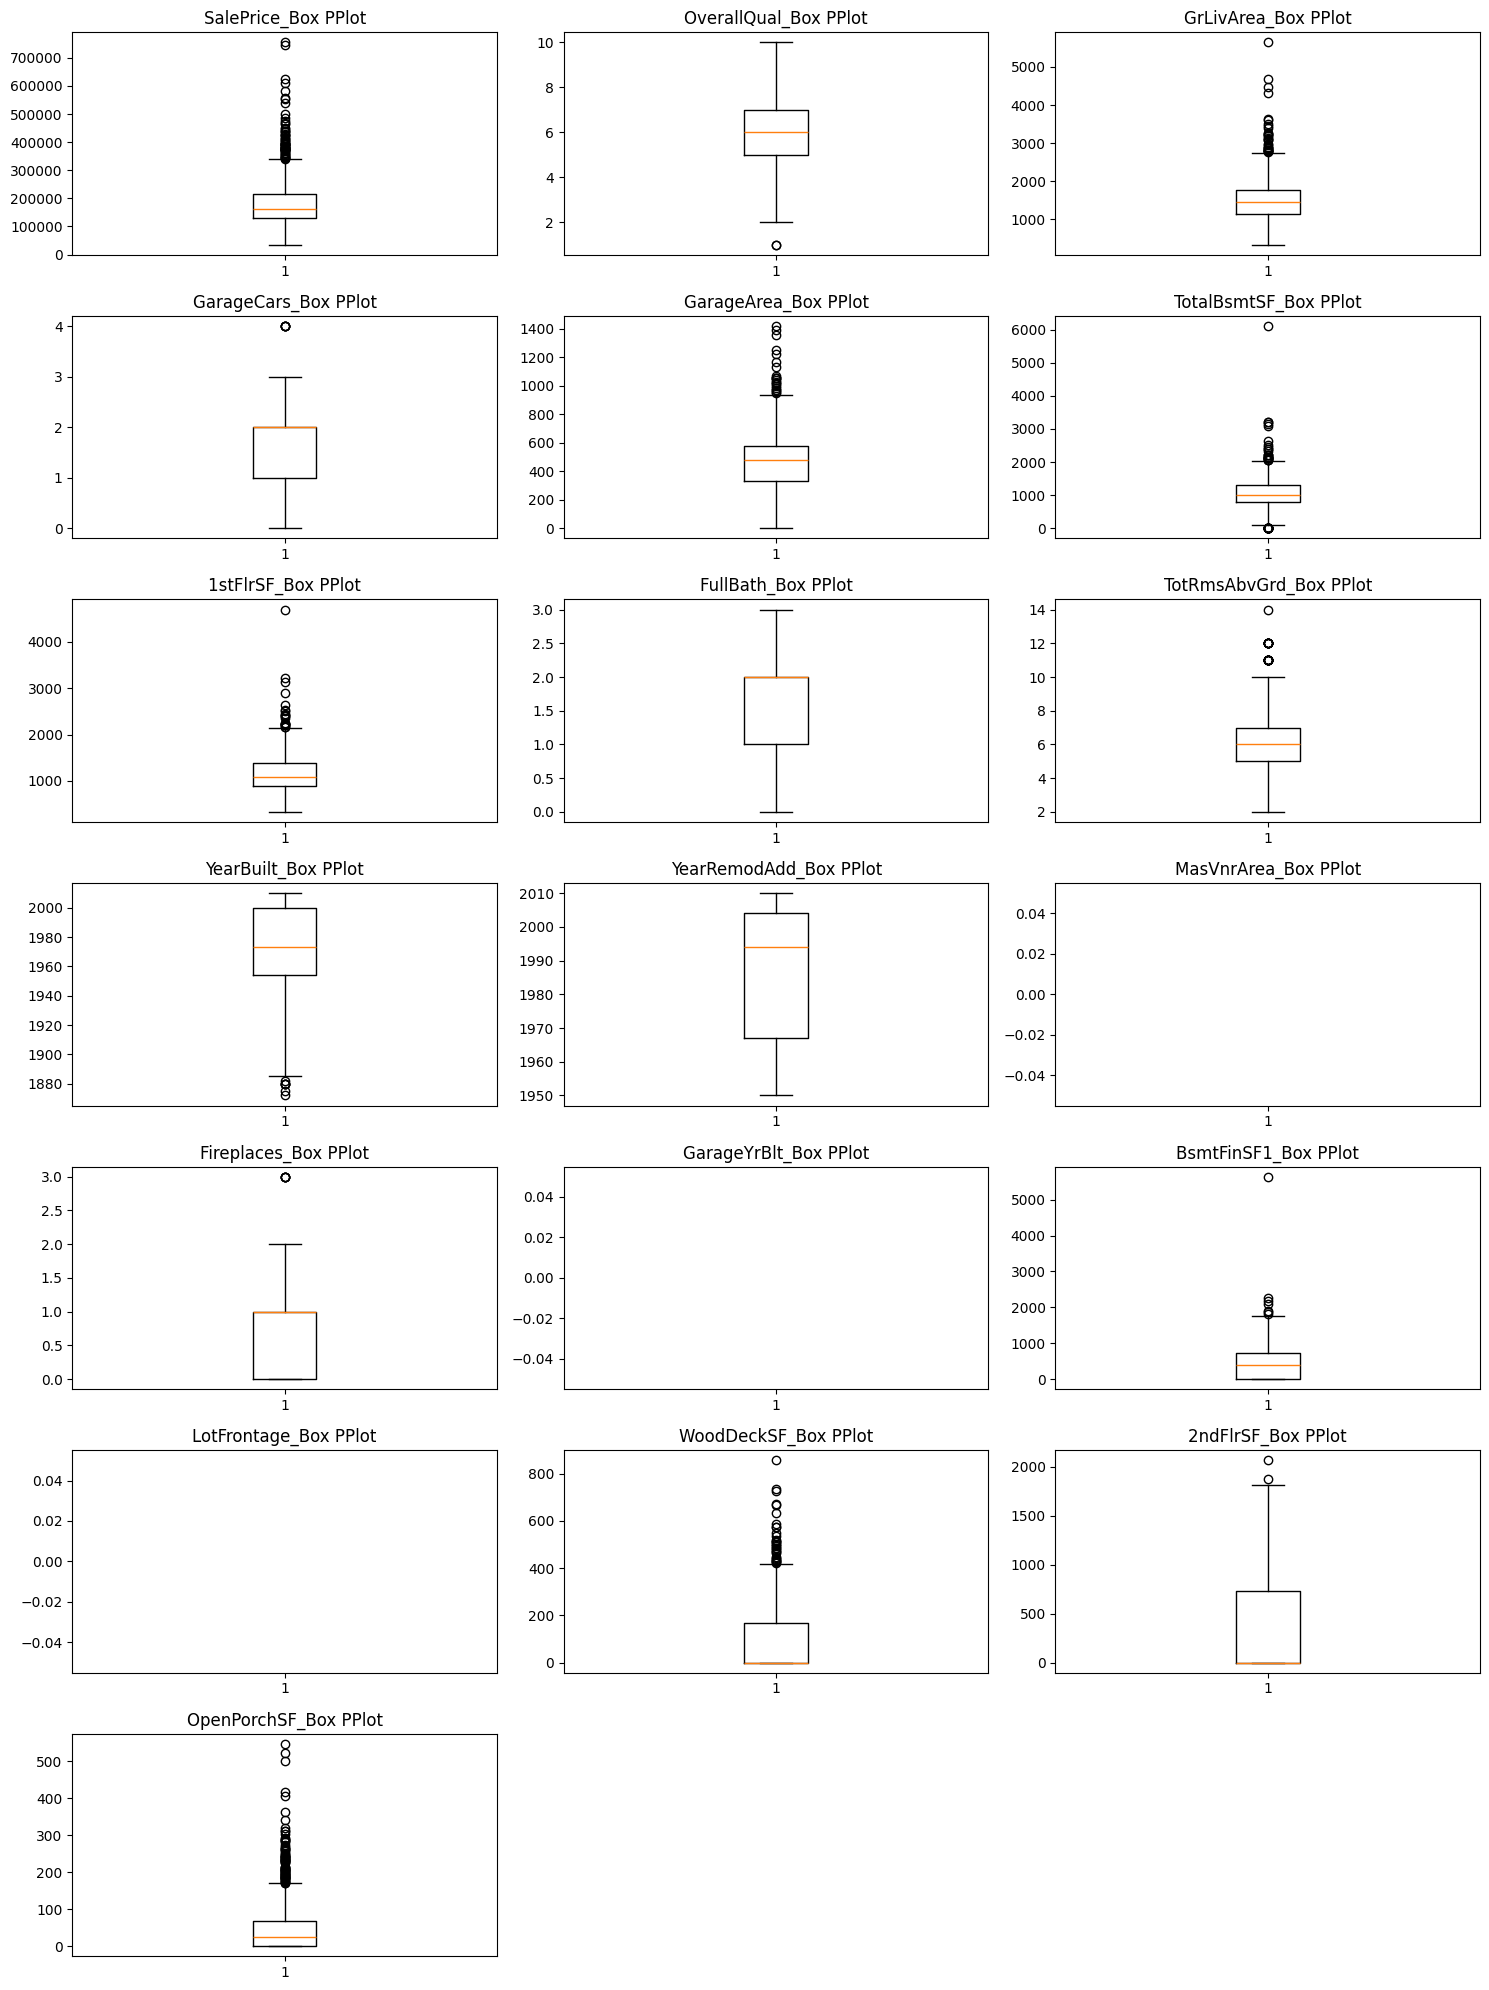

In [36]:
plt.figure(figsize=(15,20))
for col in range(len(selected_num)):
    plt.subplot(7,3,(col+1))
    plt.boxplot(df[selected_num[col]])
    plt.title(f'{selected_num[col]}_Box PPlot')
plt.tight_layout()
plt.show()

In [37]:
for col in selected_num:
    Q1 = round(np.percentile(df[col], 25), 2)
    Q3 = round(np.percentile(df[col], 75), 2)
    IQR = Q3 - Q1
    lb = Q1 - IQR * 1.5
    ub = Q3 + IQR * 1.5

    con = (df[col] < lb) | (df[col] > ub)

    outlier_df = df[col][con]              
    print(f'{col} = {len(outlier_df)} Outliers')

SalePrice = 61 Outliers
OverallQual = 2 Outliers
GrLivArea = 31 Outliers
GarageCars = 5 Outliers
GarageArea = 21 Outliers
TotalBsmtSF = 61 Outliers
1stFlrSF = 20 Outliers
FullBath = 0 Outliers
TotRmsAbvGrd = 30 Outliers
YearBuilt = 7 Outliers
YearRemodAdd = 0 Outliers
MasVnrArea = 0 Outliers
Fireplaces = 5 Outliers
GarageYrBlt = 0 Outliers
BsmtFinSF1 = 7 Outliers
LotFrontage = 0 Outliers
WoodDeckSF = 32 Outliers
2ndFlrSF = 2 Outliers
OpenPorchSF = 77 Outliers


In [38]:
for col in selected_num:
        Q1 = round(np.percentile(df[col], 25), 2)
        Q3 = round(np.percentile(df[col], 75), 2)
        IQR = Q3 - Q1
        lb = Q1 -  1.5 * IQR
        ub = Q3 +  1.5 * IQR
        df[col]=df[col].clip(lower=lb,upper=ub)

Now outliers are detected and treated fully now we will do encoding of catagorical data type.There are two different techniques one hot encoding and label encoding for this we will divide our catagories into two sub parts in one we will apply one hot encoding which will be best for data that donot has any order i.e it is nominal and for other we will do label encoding i.e data has an order.

In [39]:
for col in selected_cat:
    print(f"{col}: {df[col].nunique()} unique values")

MSZoning: 5 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
LotConfig: 5 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 3 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 5 unique values
GarageType: 6 unique values
GarageFinish: 3 unique values
GarageQual: 5 unique values
GarageCond: 5 unique values
PavedDrive: 3 unique values
Fence: 4 unique values
Sale

In [40]:
labelvalues={}
for col in selected_cat:
     value_counts = df[col].value_counts()
     labels = value_counts[value_counts >= 5].index.tolist()
     if labels:
          labelvalues[col] = labels
print("Categories with rare labels (5 or fewer occurrences):")
print("="*53)
for col, values in labelvalues.items():
    print(f"{col}")

Categories with rare labels (5 or fewer occurrences):
MSZoning
Alley
LotShape
LandContour
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


Apply  label encoding on them.

In [41]:
df_selected = df_selected.copy()
for col in labelvalues.keys():
    le = LabelEncoder() 
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

In [42]:
df_selected.head(3)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
0,208500,7,1710,2,548,856,856,2,8,2003,...,5,1,1,4,4,2,4,8,4,208500
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,4,1,1,4,4,2,4,8,4,181500
2,223500,7,1786,2,608,920,920,2,6,2001,...,4,1,1,4,4,2,4,8,4,223500


In [43]:
onehotvalues = {}

for col in selected_cat:
    n_unique = df[col].nunique()  # total unique values in column
    if n_unique > 5:              # high cardinality
        onehotvalues[col] = df[col].unique().tolist()

print("Columns to apply One-Hot Encoding (>5 unique values):")
for col in onehotvalues.keys():
    print(col)

Columns to apply One-Hot Encoding (>5 unique values):
Neighborhood
Condition1
Condition2
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
Foundation
BsmtFinType1
BsmtFinType2
Heating
Functional
GarageType
SaleType
SaleCondition


In [44]:
df_selected = df_selected.copy()
for col in onehotvalues.keys():
    df_selected[col] = df_selected[col].astype(str)
    dummies = pd.get_dummies(df_selected[col], prefix=col, drop_first=True)
    df_selected = pd.concat([df_selected, dummies], axis=1)
    df_selected.drop(col, axis=1, inplace=True)

In [45]:
df_selected.head(3)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,208500,7,1710,2,548,856,856,2,8,2003,...,False,False,False,False,True,False,False,False,True,False
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,False,False,False,False,True,False,False,False,True,False
2,223500,7,1786,2,608,920,920,2,6,2001,...,False,False,False,False,True,False,False,False,True,False


In [46]:
df_selected.isna().sum().sum()

np.int64(348)

In [47]:
df_selected.dropna(inplace=True)

In [48]:
bool_cols = df_selected.select_dtypes(include='bool').columns
df_selected[bool_cols] = df_selected[bool_cols].astype(int)

In [49]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Columns: 176 entries, SalePrice to SaleCondition_5
dtypes: float64(3), int64(173)
memory usage: 1.5 MB


In [58]:
from sklearn.model_selection import train_test_split
X = df_selected.drop('SalePrice', axis=1)   
y = df_selected['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train = X_train.astype(float)

In [52]:
print(X_train.dtypes)
print(type(y_train))  

OverallQual        float64
GrLivArea          float64
GarageCars         float64
GarageArea         float64
TotalBsmtSF        float64
                    ...   
SaleCondition_1    float64
SaleCondition_2    float64
SaleCondition_3    float64
SaleCondition_4    float64
SaleCondition_5    float64
Length: 174, dtype: object
<class 'pandas.core.frame.DataFrame'>


In [53]:
print(type(y_train))  # should be <class 'pandas.core.series.Series'>
print(y_train.shape)

<class 'pandas.core.frame.DataFrame'>
(896, 2)


In [54]:
df_selected.columns[df_selected.columns.duplicated()]


Index(['SalePrice'], dtype='object')

In [55]:
df_selected = df_selected.loc[:, ~df_selected.columns.duplicated()]


In [56]:
df_selected.columns[df_selected.columns.duplicated()]


Index([], dtype='object')

In [60]:
from xgboost import XGBRegressor
model = XGBRegressor(
   objective='reg:squarederror',
   n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    min_child_weight=3,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=5,
    reg_alpha=0.1,
    reg_lambda=0.5,
    random_state=42
)
model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.7
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [61]:
from sklearn.metrics import mean_squared_error 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE:  {test_rmse:.2f}")

Training RMSE: 4987.82
Testing RMSE:  27024.93
